# Double Pendulum

## Table of Contents

- [Batches and the Data Structure](#batches-and-the-data-structure)
- [Query Data](#query-data)
- [Initial Parameters](#initial-parameters)
- [Pendulum Motion Animation](#pendulum-motion-animation)
- [Plot Trajectories](#plot-trajectories)
  - [Different Initial Angles](#different-initial-angles)
  - [Different Initial Velocities](#different-initial-velocities)
- [Statistics](#statistics)
- [Standard Deviation Boundary Test](#standard-deviation-boundary-test)

## Batches and the Data Structure

We conducted simulations of the double pendulum system with varying initial parameters:

- In the batch 'double_pendulum_angles' we varied the initial angles of the first pendulum by selecting values randomly from a normal distribution with a mean of 120 degrees and a standard deviation of 5 degrees.

- In the batch 'double_pendulum_vel' we varied the initial velocity of the second pendulum, choosing values randomly from a normal distribution with a mean of 90 degrees per second and a standard deviation of 5 degrees per second.

In [1]:
from citros_data_analysis import data_access as da

Let's create CitrosDB object to query and plot the results of the simulations. Let's specify that we would like to see batches that were created with double pendulum simulation scenario:

In [2]:
citros = da.CitrosDB(simulation = 'simulation_double_pendulum')

To print information about all batches created in 'simulation_double_pendulum' simulation, call `search_batch()`:

In [3]:
citros.search_batch().print()

{
 'test_double_pendulum': {
   'id': 'a5407516-78bf-4d70-bab4-dd7688ac5139',
   'sid': [0],
   'created_at': '2023-11-28T07:35:11.643697+00:00',
   'updated_at': '2023-11-28T08:53:18.443289+00:00',
   'status': 'RUNNING',
   'data_status': 'LOADED',
   'data_last_access': '2023-11-28T08:53:18.443289+00:00',
   'tag': '0e96e8f85a557a9a40ad036c784773acca95f60c',
   'simulation': 'simulation_double_pendulum',
   'message': 'test',
   'parallelism': 1,
   'completions': 1,
   'cpu': 2,
   'gpu': 0,
   'memory': '265',
   'repo': 'pendulum',
   'link': 'https://citros.io/pendulum/data/runs/simulation_double_pendulum/test_double_pendulum'
 },
 'double_pendulum_vel': {
   'id': 'a0c989f2-f36a-4639-bc21-bd4c74c13871',
   'sid': [0, 1, 2, 3, 4, 5, 6],
   'created_at': '2023-11-27T12:26:10.385742+00:00',
   'updated_at': '2023-11-27T14:41:04.606914+00:00',
   'status': 'DONE',
   'data_status': 'LOADED',
   'data_last_access': '2023-11-27T14:41:04.606914+00:00',
   'tag': '0e96e8f85a557a9a40ad0

Let's print the names of the batches containing simulations with the status 'DONE'. This indicates that the simulations have successfully finished:

In [4]:
list(citros.search_batch(sid_status='DONE').keys())

['double_pendulum_vel',
 'double_pendulum_angles',
 'cloud_test_double_pendulum_2',
 'cloud_test_double_pendulum_1']

Print general information about the most recent simulation. In this simulation we have two topics: '/config' and '/coordinates':

In [5]:
citros.batch(-1).info().print()

{
 'size': '236 kB',
 'sid_count': 1,
 'sid_list': [0],
 'topic_count': 2,
 'topic_list': ['/config', '/coordinates'],
 'message_count': 503
}


Topic '/config' contains initial parameters of the simulation, topic '/coordinates' contains result of the simulation. Let's look on data structure of the topic '/coordinates':

In [6]:
citros.batch(-1).topic('/coordinates').info().print()

{
 'size': '235 kB',
 'sid_count': 1,
 'sid_list': [0],
 'topic_count': 1,
 'topic_list': ['/coordinates'],
 'message_count': 501,
 'topics': {
   '/coordinates': {
     'type': 'double_pendulum_interfaces/msg/DoublePendulum',
     'data_structure': {
       'data': {
         't': 'float',
         'p1': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         'p2': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         '__msgtype__': 'str'
       }
     },
     'message_count': 501
   }
 }
}


As we stated in the README, the result of the simulation has the following structure: there is time coordinate 'data.t' and two coordinates of the two pendulums: data.p1.x, data.p1.y, data.p2.x, data.p2.y; there is also a record about the type of the ros message:

In [7]:
citros.batch(-1).topic('/coordinates').info()['topics']['/coordinates']['data_structure']['data'].print()

{
 't': 'float',
 'p1': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 'p2': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 '__msgtype__': 'str'
}


## Query Data

Let's query data by `data()` method. If we call `data()` method without arguments we get all data separated by columns.


The output of the `data()` method is a pandas.DataFrame, so every method of the pandas.DataFrame can be applied to the result of the query.
Here by `head()` method we left only first 5 rows of the output:

In [8]:
citros.batch(-1).topic('/coordinates').data().head(5)

,sid,rid,time,topic,type,data.t,data.__msgtype__,data.p1.x,data.p1.y,data.p1.__msgtype__,data.p2.x,data.p2.y,data.p2.__msgtype__
0,0,0,1701158360521136269,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.00,double_pendulum_interfaces/msg/DoublePendulum,1.039230,0.600000,double_pendulum_interfaces/msg/PendulumCoord,0.539230,-0.266025,double_pendulum_interfaces/msg/PendulumCoord
1,0,1,1701158360621183195,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.01,double_pendulum_interfaces/msg/DoublePendulum,1.039509,0.599518,double_pendulum_interfaces/msg/PendulumCoord,0.552713,-0.273998,double_pendulum_interfaces/msg/PendulumCoord
2,0,2,1701158360721175362,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.02,double_pendulum_interfaces/msg/DoublePendulum,1.040341,0.598073,double_pendulum_interfaces/msg/PendulumCoord,0.566444,-0.282508,double_pendulum_interfaces/msg/PendulumCoord
3,0,3,1701158360821036292,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.03,double_pendulum_interfaces/msg/DoublePendulum,1.041722,0.595664,double_pendulum_interfaces/msg/PendulumCoord,0.580405,-0.291571,double_pendulum_interfaces/msg/PendulumCoord
4,0,4,1701158360921123032,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.04,double_pendulum_interfaces/msg/DoublePendulum,1.043642,0.592293,double_pendulum_interfaces/msg/PendulumCoord,0.594579,-0.301207,double_pendulum_interfaces/msg/PendulumCoord


We can query not all data, but, for example, only time and coordinates of the second pendulum:

In [9]:
citros.batch(-1).topic('/coordinates').data(['data.t', 'data.p2.x', 'data.p2.y']).head(5)

,sid,rid,time,topic,type,data.t,data.p2.x,data.p2.y
0,0,0,1701158360521136269,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.00,0.539230,-0.266025
1,0,1,1701158360621183195,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.01,0.552713,-0.273998
2,0,2,1701158360721175362,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.02,0.566444,-0.282508
3,0,3,1701158360821036292,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.03,0.580405,-0.291571
4,0,4,1701158360921123032,/coordinates,double_pendulum_interfaces/msg/DoublePendulum,0.04,0.594579,-0.301207


## Initial Parameters

In '/config' topic we can find all the initial parameters. It is convenient to get them as a dictionary:

In [10]:
name = 'data.double_pendulum.ros__parameters'
params = citros.batch(-1).topic('/config').data(name, additional_columns='sid')
params = params[params[name].notna()].set_index('sid')[name]

print(f"pandas.Series with initial parameters for the simulation runs:\n{params}")
print(f"\ndict with paramaters for the sid = 0:\n{params[0]}")
print(f"\ninitial angle for the sid = 0:\na1_0 = {params[0]['a1_0']}")

pandas.Series with initial parameters for the simulation runs:
sid
0    {'T': 5.0, 'h': 0.01, 'l1': 1.2, 'l2': 1.0, 'm...
Name: data.double_pendulum.ros__parameters, dtype: object

dict with paramaters for the sid = 0:
{'T': 5.0, 'h': 0.01, 'l1': 1.2, 'l2': 1.0, 'm1': 1.0, 'm2': 1.0, 'a1_0': 120.0, 'a2_0': -30.0, 'v1_0': 0.0, 'v2_0': 88.34475380317582, 'publish_freq': 10.0}

initial angle for the sid = 0:
a1_0 =120.0


## Pendulum Motion Animation

Let's query data and plot the animation of the pendulum motion for the first 5 second of one of the simulation run, for example for sid = 0:

In [11]:
F = citros.batch(-1).sid(0).set_filter({'data.t': {'<=': 5}}).topic('/coordinates').data()

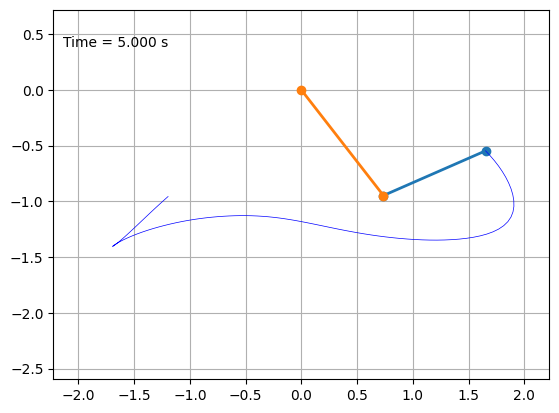

In [12]:
import matplotlib.pyplot as plt
from collections import deque

def animate(F):
    # length of the history trace
    trace_len = 100

    max_y_0 = abs(min(F['data.p2.y']))*1.2
    max_y_1 = max([max(F['data.p1.y']), max(F['data.p2.y'])])*1.2
    max_x = max([max(abs(F['data.p1.x'])), max(abs(F['data.p2.x'])), 0.1])*1.2
    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-max_x, max_x), ylim=(-max_y_0, max_y_1))
    ax.set_aspect('equal', 'datalim')
    ax.grid()

    line1, = ax.plot([], [], 'o-', lw=2)
    line2, = ax.plot([], [], 'o-', lw=2)
    trace, = ax.plot([], [], 'b-', lw=0.5, ms=1)
    time_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
    trace_x, trace_y = deque(maxlen=trace_len), deque(maxlen=trace_len)

    plt.close()
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        trace.set_data([], [])
        time_text.set_text('')
        trace_x.clear()
        trace_y.clear()
        return line1, line2, trace, time_text

    def animate_frame(i):
        trace_x.appendleft(F['data.p2.x'].iloc[i])
        trace_y.appendleft(F['data.p2.y'].iloc[i])

        line1.set_data([[F['data.p1.x'].iloc[i],F['data.p2.x'].iloc[i]],[F['data.p1.y'].iloc[i], F['data.p2.y'].iloc[i]]])
        line2.set_data([[0,F['data.p1.x'].iloc[i]],[0, F['data.p1.y'].iloc[i]]])
        trace.set_data(trace_x, trace_y)

        time_text.set_text('Time = %.3f s' % F['data.t'].iloc[i])
        return line1, line2, trace, time_text
    
    init()
    for i in range(len(F)):
        animate_frame(i)
        display(fig, clear=True)

animate(F)

The animation playback speed depends on the length of the data. If the animation is too slow, you just can decrees the number of messages in query by averaging or picking every n-th message. For example, to select every 5th message:

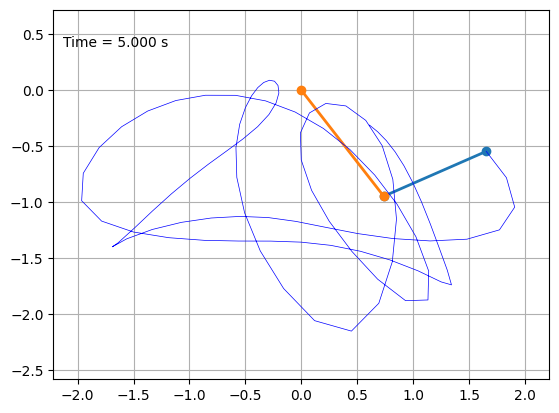

In [13]:
F = citros.batch(-1).sid(0).skip(5).set_filter({'data.t': {'<=': 5}}).topic('/coordinates').data()
animate(F)

## Plot Trajectories

Small variations in the initial parameters of the double pendulum system lead to significant changes in trajectories.
Let's plot the trajectories for simulations where either initial angle or initial velocities are varied.

### Different Initial Angles

In the batch 'double_pendulum_angles' we have simulations with different initial angles of the first pendulum.
We can print the initial angles using the '/config' topic:

In [14]:
col_name = 'data.double_pendulum.ros__parameters.a1_0'

a1_0 = citros.batch('double_pendulum_angles').topic('/config').data(col_name, additional_columns='sid').rename({col_name: 'a1_0'}, axis = 1)
a1_0 = a1_0 [a1_0 ['a1_0'].notna()].set_index('sid')
a1_0

,a1_0
sid,
0,117.642381
1,115.928387
2,115.404127
3,117.184502
4,121.258164
5,117.592449
6,115.255676


Let's plot the trajectory of the second pendulum from the different simulations:

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='data.p2.x', ylabel='data.p2.y'>)

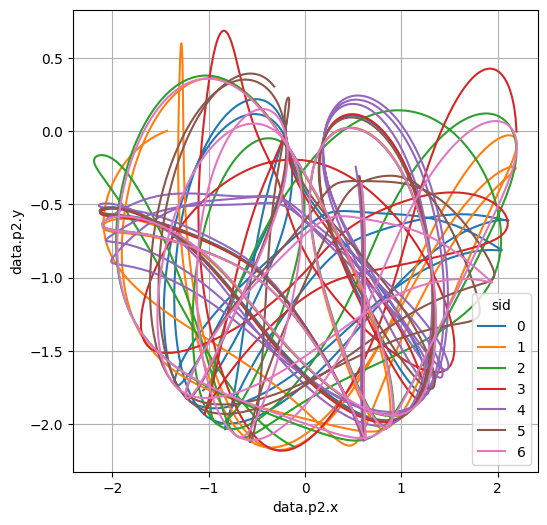

In [15]:
F = citros.batch('double_pendulum_angles').topic('/coordinates').data()
citros.plot_graph(F, 'data.p2.x', 'data.p2.y')

Let's plot the trajectory of the second pendulum from the first and second simulations:

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='data.p2.x', ylabel='data.p2.y'>)

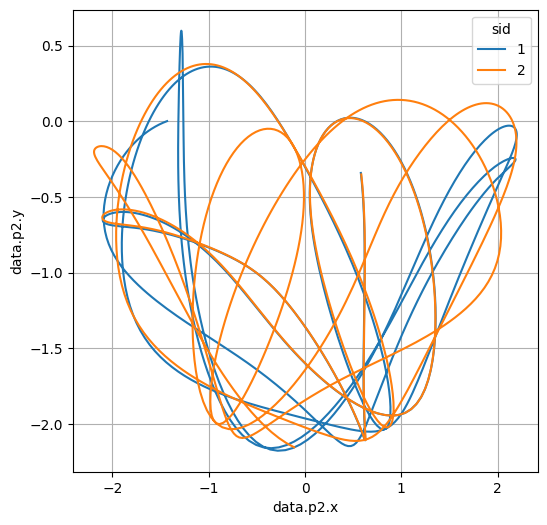

In [16]:
F = citros.batch('double_pendulum_angles').topic('/coordinates').sid([1,2]).data()
citros.plot_graph(F, 'data.p2.x', 'data.p2.y')

### Different Initial Velocities

Batch named 'double_pendulum_vel' contains simulations obtained by varying the initial angular velocities of the second pendulum.
Let's first print them:

In [17]:
col_name = 'data.double_pendulum.ros__parameters.v2_0'

v2_0 = citros.batch('double_pendulum_vel').topic('/config').data(col_name, additional_columns='sid').rename({col_name: 'v2_0'}, axis = 1)
v2_0 = v2_0 [v2_0 ['v2_0'].notna()].set_index('sid')
v2_0

,v2_0
sid,
0,89.822781
1,95.866677
2,87.279594
3,94.661600
4,91.325745
5,95.047632
6,86.936752


And let's plot the trajectory of the second pendulum for all simulations:

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='data.p2.x', ylabel='data.p2.y'>)

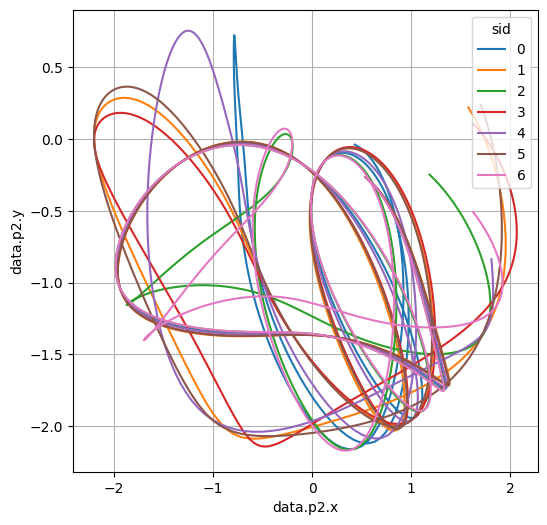

In [18]:
F = citros.batch('double_pendulum_vel').topic('/coordinates').data()
citros.plot_graph(F, 'data.p2.x', 'data.p2.y')

And separete plot for the 1 and 2 simulations:

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='data.p2.x', ylabel='data.p2.y'>)

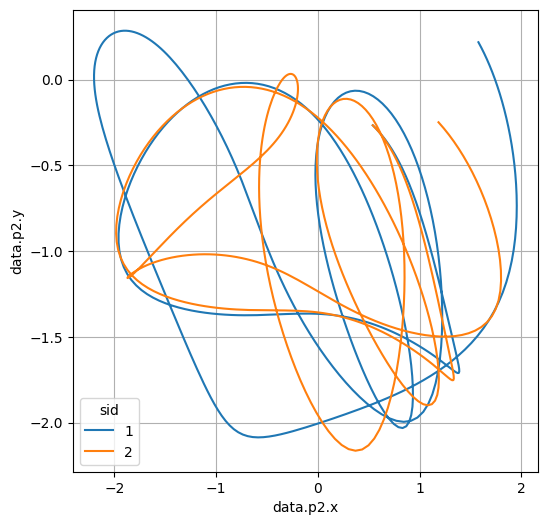

In [19]:
F = citros.batch('double_pendulum_vel').topic('/coordinates').sid([1,2]).data()
citros.plot_graph(F, 'data.p2.x', 'data.p2.y')

## Statistics

We can examine how the coordinates of the second pendulum, along with their mean values and standard deviations, change over time using the `citros_data_analysis.error_analysis` package:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data.py:1097: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


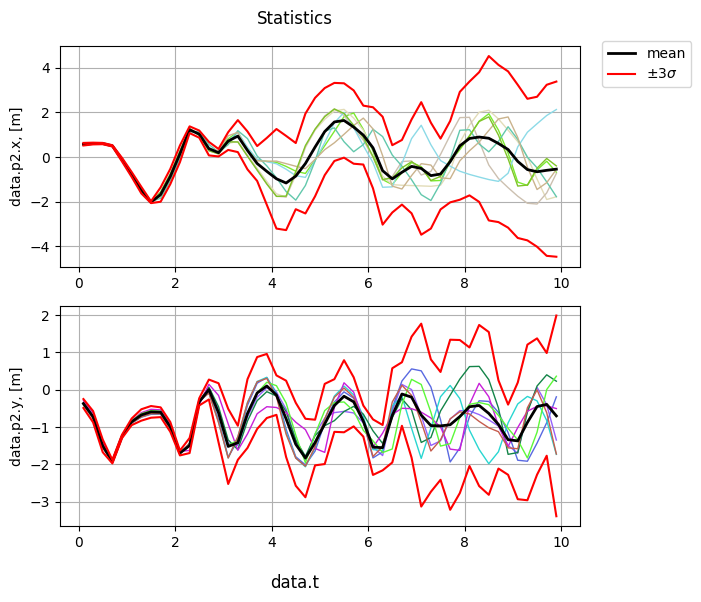

In [20]:
from citros_data_analysis import error_analysis as analysis
F = citros.batch('double_pendulum_angle').topic('/coordinates').data()
dataset = analysis.CitrosData(F, data_label=['data.p2.x', 'data.p2.y'], units = 'm')
db = dataset.bin_data(n_bins = 50, param_label = 'data.t')
db.show_statistics()

Let's plot the scatter plot of the last points of the simulation (around 'data.t' = 10). Let's also depict 1-, 2-, 3-sigma error ellipses and print parameters of the 1-sigma ellipse:

slice_id = 49,
slice_val = 9.9


{'x': -0.5432189229946751,
 'y': -0.7011404909413842,
 'width': 2.6825251790145175,
 'height': 1.697182615369751,
 'alpha': 16.201816702731858}

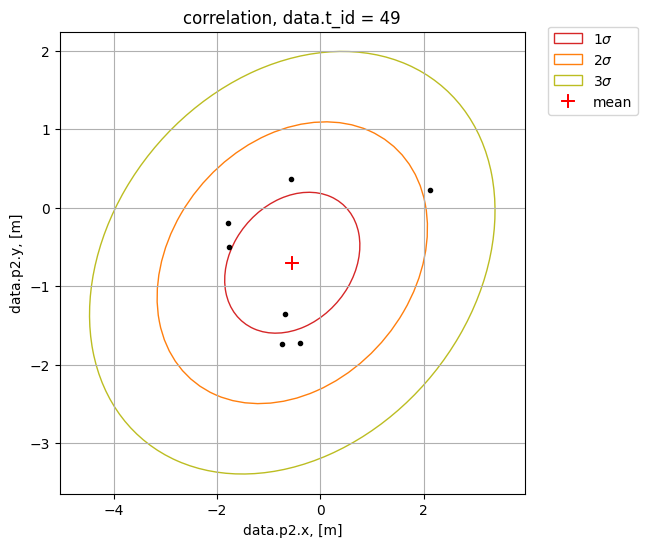

In [21]:
ellipse_param = db.show_correlation(x_col = 'data.p2.x', y_col = 'data.p2.y',
                      slice_val = 10, n_std = [1,2,3], return_ellipse_param = True)
ellipse_param[0]

## Standard Deviation Boundary Test

By utilizing different tests from the `citros_data_analysis.validation` package, you can quickly determine whether the simulation meets specific conditions. For instance, let's verify if the standard deviation remains within certain limits. Suppose we want to check if the mean value of the coordinates for the second pendulum, along with its 1-sigma standard deviation boundary, falls within a 2.5 x 2.5 box for the 'double_pendulum_angle' batch:

std_bound_test: passed


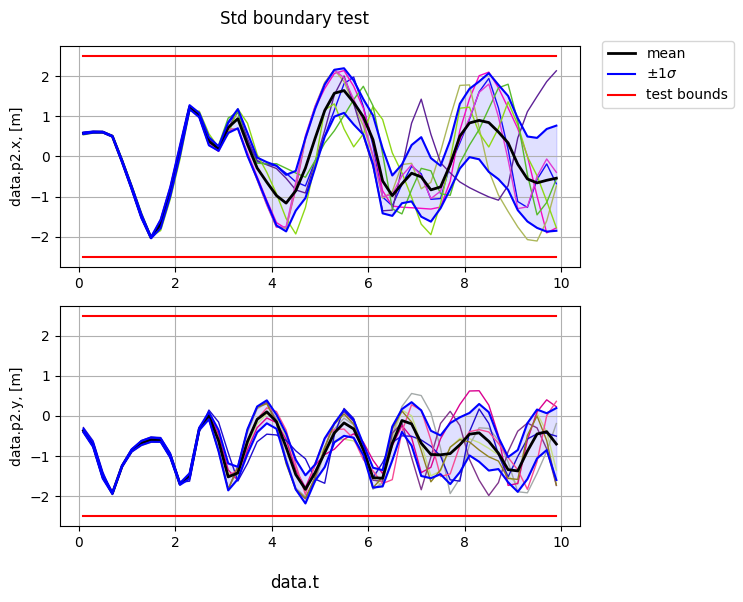

In [25]:
from citros_data_analysis import validation as va
F = citros.batch('double_pendulum_angle').topic('/coordinates').data()
V = va.Validation(F, data_label = ['data.p2.x', 'data.p2.y'], param_label = 'data.t', method = 'bin', num = 50, units = 'm')
log, table, fig = V.std_bound_test(limits = 2.5, n_std = 1, std_area = True)

In [23]:
ref = da.Ref()
ref.print()

REFERENCES:

yalyalieva lidia, lidia@lulav.space
double_pendulum_angles, 'random initial angle of the first pendulum, gauss 120, 5', 2023-11-27 07:51:55
https://citros.io/pendulum/batch/cff10f16-c8f2-4ed0-96e2-d6dcc58a9b95/

yalyalieva lidia, lidia@lulav.space
double_pendulum_vel, 'random initial velocity of the second pendulum, gauss 90, 5', 2023-11-27 12:26:10
https://citros.io/pendulum/batch/a0c989f2-f36a-4639-bc21-bd4c74c13871/

yalyalieva lidia, lidia@lulav.space
test_double_pendulum, 'test', 2023-11-28 07:35:11
https://citros.io/pendulum/batch/a5407516-78bf-4d70-bab4-dd7688ac5139/

